In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#data = pd.read_csv("LCDataDictionary.csv",encoding='latin1')
#data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/lending_loans.csv", encoding='latin-1',low_memory=False)  #loading file from drive , changing the encoding
data.shape

(42552, 115)

In [ ]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,505136,650770.0,20000.0,20000.0,19500.0,36 months,9.88%,644.21,B,B1,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
42548,473367,598172.0,1750.0,1750.0,1750.0,36 months,11.83%,57.99,B,B3,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
42549,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42550,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(86), object(29)
memory usage: 37.3+ MB


In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=115)

In [ ]:
empty_columns = []      # finding coloumns with null values
for column in data.columns:
    if data[column].isnull().all():
        empty_columns.append(column)

print(empty_columns)

['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_

In [ ]:
list = ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']

In [ ]:
print(len(list)) #no of empty coloumns

54


In [ ]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
data.drop(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
           'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
           'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
           'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
           'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
           'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
           'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], axis=1, inplace=True)

#dropping unnecessary features

In [ ]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,505136,650770.0,20000.0,20000.0,19500.0,36 months,9.88%,644.21,B,B1,...,839.0,835.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
42548,473367,598172.0,1750.0,1750.0,1750.0,36 months,11.83%,57.99,B,B3,...,709.0,705.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
42549,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,794.0,790.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42550,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

,0
id,object
member_id,float64
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
...,...
acc_now_delinq,object
chargeoff_within_12_mths,object
delinq_amnt,float64
pub_rec_bankruptcies,float64


In [ ]:
data.info()  #checking number of coloumns after removing completely empty columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42552 non-null  object 
 1   member_id                   42549 non-null  float64
 2   loan_amnt                   42549 non-null  float64
 3   funded_amnt                 42549 non-null  float64
 4   funded_amnt_inv             42549 non-null  float64
 5   term                        42549 non-null  object 
 6   int_rate                    42549 non-null  object 
 7   installment                 42549 non-null  float64
 8   grade                       42549 non-null  object 
 9   sub_grade                   42549 non-null  object 
 10  emp_title                   39922 non-null  object 
 11  emp_length                  41437 non-null  object 
 12  home_ownership              42549 non-null  object 
 13  annual_inc                  425

In [ ]:
data.drop(['id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'title'], axis=1, inplace=True) ##not necessary for prediiction

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42549 non-null  float64
 1   funded_amnt                 42549 non-null  float64
 2   funded_amnt_inv             42549 non-null  float64
 3   term                        42549 non-null  object 
 4   int_rate                    42549 non-null  object 
 5   installment                 42549 non-null  float64
 6   grade                       42549 non-null  object 
 7   sub_grade                   42549 non-null  object 
 8   emp_length                  41437 non-null  object 
 9   home_ownership              42549 non-null  object 
 10  annual_inc                  42545 non-null  float64
 11  verification_status         42549 non-null  object 
 12  issue_d                     42549 non-null  object 
 13  loan_status                 425

In [ ]:
data.shape

(42552, 54)

In [ ]:
data = data.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})  ##renamed few for better understanding of myself

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 42549 non-null  float64
 1   funded_amount               42549 non-null  float64
 2   investor_funds              42549 non-null  float64
 3   term                        42549 non-null  object 
 4   interest_rate               42549 non-null  object 
 5   installment                 42549 non-null  float64
 6   grade                       42549 non-null  object 
 7   sub_grade                   42549 non-null  object 
 8   emp_length                  41437 non-null  object 
 9   home_ownership              42549 non-null  object 
 10  annual_income               42545 non-null  float64
 11  verification_status         42549 non-null  object 
 12  issue_d                     42549 non-null  object 
 13  loan_status                 425

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.delinq_2yrs.unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., nan, 13.])

In [ ]:
# data_meaning = pd.read_csv("LCDataDictionary.csv", encoding="latin-1")
# data_meaning

In [ ]:
data.columns

Index(['loan_amount', 'funded_amount', 'investor_funds', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_income', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'p

In [ ]:
data.term.unique() ##Nominal encoding has to be applied



array([' 36 months', ' 60 months', nan], dtype=object)

In [ ]:
data.interest_rate.unique() ##convert this to integer
data['interest_rate'] = data['interest_rate'].str.rstrip('%').astype(float)

In [ ]:
data.interest_rate.dtypes

dtype('float64')

In [ ]:
data.grade.unique() ##ordinal encoding has to be applied

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 42549 non-null  float64
 1   funded_amount               42549 non-null  float64
 2   investor_funds              42549 non-null  float64
 3   term                        42549 non-null  object 
 4   interest_rate               42549 non-null  float64
 5   installment                 42549 non-null  float64
 6   grade                       42549 non-null  object 
 7   sub_grade                   42549 non-null  object 
 8   emp_length                  41437 non-null  object 
 9   home_ownership              42549 non-null  object 
 10  annual_income               42545 non-null  float64
 11  verification_status         42549 non-null  object 
 12  issue_d                     42549 non-null  object 
 13  loan_status                 425

In [ ]:
data.mths_since_last_record.unique()

array([ nan, 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  63.,  94., 109.,
        99., 104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,
        44.,  80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,
        64.,  50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,
        73.,  11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,
        30.,  41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,
        13.,  48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120.,
       129.,   5.,  24.,  15.])

In [ ]:
data.drop(['mths_since_last_record'], axis=1, inplace=True) ##Since purpose has very little what to do with the loan payment

In [ ]:
data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational', nan], dtype=object)

In [ ]:
data.loan_status.value_counts()


,count
loan_status,
Fully Paid,33593
Charged Off,5657
Does not meet the credit policy. Status:Fully Paid,1990
Does not meet the credit policy. Status:Charged Off,762
Current,513
In Grace Period,16
Late (31-120 days),12
Late (16-30 days),5
Default,1


# **Let me collect top 15-20 features**

In [ ]:
data.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', nan], dtype=object)

In [ ]:
data.addr_state.value_counts()

,count
addr_state,
CA,7431
NY,4067
FL,3105
TX,2917
NJ,1988
IL,1673
PA,1651
GA,1503
VA,1487


In [ ]:
data.drop(['purpose'], axis=1, inplace=True) #purpose is considered not that important for prediction

In [ ]:
data.loan_amount.value_counts()

,count
loan_amount,
10000.0,3017
12000.0,2439
5000.0,2262
6000.0,2036
15000.0,2012
...,...
10350.0,1
19100.0,1
17975.0,1


In [ ]:
## Apply nominal encoding to term

In [ ]:
ownership_counts = data.home_ownership.unique()  ##plot a graph between interest rate and loan paid

In [ ]:
loanpaid_counts = data.loan_status.value_counts()

In [ ]:
data.drop(['home_ownership'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 42549 non-null  float64
 1   funded_amount               42549 non-null  float64
 2   investor_funds              42549 non-null  float64
 3   term                        42549 non-null  object 
 4   interest_rate               42549 non-null  float64
 5   installment                 42549 non-null  float64
 6   grade                       42549 non-null  object 
 7   sub_grade                   42549 non-null  object 
 8   emp_length                  41437 non-null  object 
 9   annual_income               42545 non-null  float64
 10  verification_status         42549 non-null  object 
 11  issue_d                     42549 non-null  object 
 12  loan_status                 42549 non-null  object 
 13  pymnt_plan                  425

In [ ]:
data.drop(columns=['sub_grade'], inplace=True)

In [ ]:
data.pymnt_plan.unique()
data.pymnt_plan.value_counts()

,count
pymnt_plan,
False,42548
True,1


In [ ]:
data.drop(columns=['pymnt_plan'], inplace=True)

In [ ]:
data.verification_status.value_counts()

,count
verification_status,
Not Verified,18765
Verified,13474
Source Verified,10310


In [ ]:
data.drop(columns=['policy_code'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 42549 non-null  float64
 1   funded_amount               42549 non-null  float64
 2   investor_funds              42549 non-null  float64
 3   term                        42549 non-null  object 
 4   interest_rate               42549 non-null  float64
 5   installment                 42549 non-null  float64
 6   grade                       42549 non-null  object 
 7   emp_length                  41437 non-null  object 
 8   annual_income               42545 non-null  float64
 9   verification_status         42549 non-null  object 
 10  issue_d                     42549 non-null  object 
 11  loan_status                 42549 non-null  object 
 12  addr_state                  42549 non-null  object 
 13  dti                         425

In [ ]:
data.delinq_2yrs.value_counts()

,count
delinq_2yrs,
0.0,37782
1.0,3596
2.0,771
3.0,244
4.0,72
5.0,27
6.0,13
7.0,6
8.0,3


In [ ]:
data.drop(columns=['delinq_2yrs'], inplace=True)

In [ ]:
data

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,emp_length,annual_income,verification_status,...,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,24000.0,Verified,...,Sep-16,744.0,740.0,False,INDIVIDUAL,False,False,0.0,0.0,False
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,30000.0,Source Verified,...,Sep-16,499.0,0.0,False,INDIVIDUAL,False,False,0.0,0.0,False
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,12252.0,Not Verified,...,Sep-16,719.0,715.0,False,INDIVIDUAL,False,False,0.0,0.0,False
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,49200.0,Source Verified,...,Apr-16,604.0,600.0,False,INDIVIDUAL,False,False,0.0,0.0,False
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,80000.0,Source Verified,...,Sep-16,694.0,690.0,False,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,20000.0,20000.0,19500.0,36 months,9.88,644.21,B,< 1 year,55000.0,Not Verified,...,May-13,839.0,835.0,False,INDIVIDUAL,False,False,0.0,0.0,False
42548,1750.0,1750.0,1750.0,36 months,11.83,57.99,B,3 years,40000.0,Not Verified,...,Jan-16,709.0,705.0,False,INDIVIDUAL,False,False,0.0,0.0,False
42549,5000.0,5000.0,0.0,36 months,7.75,156.11,A,10+ years,70000.0,Not Verified,...,Feb-15,794.0,790.0,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.drop(columns=['funded_amount','investor_funds'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 42549 non-null  float64
 1   term                        42549 non-null  object 
 2   interest_rate               42549 non-null  float64
 3   installment                 42549 non-null  float64
 4   grade                       42549 non-null  object 
 5   emp_length                  41437 non-null  object 
 6   annual_income               42545 non-null  float64
 7   verification_status         42549 non-null  object 
 8   issue_d                     42549 non-null  object 
 9   loan_status                 42549 non-null  object 
 10  addr_state                  42549 non-null  object 
 11  dti                         42549 non-null  float64
 12  earliest_cr_line            42518 non-null  object 
 13  fico_range_low              425

In [ ]:
data.emp_length.unique()
data.emp_length.value_counts()


,count
emp_length,
10+ years,9369
< 1 year,5066
2 years,4744
3 years,4367
4 years,3651
1 year,3595
5 years,3460
6 years,2375
7 years,1875


In [ ]:
data.drop(columns=['emp_length'], inplace=True)

In [ ]:
data.issue_d.value_counts()

,count
issue_d,
Dec-11,2268
Nov-11,2232
Oct-11,2118
Sep-11,2067
Aug-11,1935
Jul-11,1876
Jun-11,1836
May-11,1704
Apr-11,1566


In [ ]:
data.mths_since_last_delinq.value_counts()

,count
mths_since_last_delinq,
0.0,821
30.0,270
19.0,266
23.0,266
15.0,263
...,...
89.0,1
107.0,1
85.0,1


In [ ]:
data.tax_liens.value_counts()

,count
tax_liens,
False,42441
True,1


In [ ]:
data.drop(columns=['tax_liens'], inplace=True)

In [ ]:
data.pub_rec_bankruptcies.value_counts()

,count
pub_rec_bankruptcies,
0.0,39327
1.0,1847
2.0,8


In [ ]:
data.drop(columns=['pub_rec_bankruptcies'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount                 42549 non-null  float64
 1   term                        42549 non-null  object 
 2   interest_rate               42549 non-null  float64
 3   installment                 42549 non-null  float64
 4   grade                       42549 non-null  object 
 5   annual_income               42545 non-null  float64
 6   verification_status         42549 non-null  object 
 7   issue_d                     42549 non-null  object 
 8   loan_status                 42549 non-null  object 
 9   addr_state                  42549 non-null  object 
 10  dti                         42549 non-null  float64
 11  earliest_cr_line            42518 non-null  object 
 12  fico_range_low              42549 non-null  float64
 13  fico_range_high             425

In [ ]:
data.delinq_amnt.value_counts()

,count
delinq_amnt,
0.0,42516
27.0,1
6053.0,1


In [ ]:
data.drop(columns=['delinq_amnt'], inplace=True)

In [ ]:
data.chargeoff_within_12_mths.value_counts()

,count
chargeoff_within_12_mths,
False,42402


In [ ]:
data.drop(columns=['chargeoff_within_12_mths'], inplace=True)

In [ ]:
data.acc_now_delinq.value_counts()

,count
acc_now_delinq,
False,42514
True,4


In [ ]:
data.drop(columns=['acc_now_delinq'], inplace=True)

In [ ]:
data.application_type.value_counts()

,count
application_type,
INDIVIDUAL,42549


In [ ]:
data.drop(columns=['application_type'], inplace=True)

In [ ]:
data.collections_12_mths_ex_med.value_counts()

,count
collections_12_mths_ex_med,
False,42402


In [ ]:
data.drop(columns=['collections_12_mths_ex_med'], inplace=True)

In [ ]:
data.last_fico_range_low.value_counts()

,count
last_fico_range_low,
705.0,1284
690.0,1268
695.0,1248
710.0,1245
715.0,1230
...,...
825.0,153
830.0,129
835.0,42


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amount              42549 non-null  float64
 1   term                     42549 non-null  object 
 2   interest_rate            42549 non-null  float64
 3   installment              42549 non-null  float64
 4   grade                    42549 non-null  object 
 5   annual_income            42545 non-null  float64
 6   verification_status      42549 non-null  object 
 7   issue_d                  42549 non-null  object 
 8   loan_status              42549 non-null  object 
 9   addr_state               42549 non-null  object 
 10  dti                      42549 non-null  float64
 11  earliest_cr_line         42518 non-null  object 
 12  fico_range_low           42549 non-null  float64
 13  fico_range_high          42549 non-null  float64
 14  inq_last_6mths        

In [ ]:
data.next_pymnt_d.value_counts()

,count
next_pymnt_d,
Oct-16,546
Mar-11,107
Apr-11,101
Feb-11,91
Jan-11,79
...,...
Aug-14,2
Mar-15,1
May-08,1


In [ ]:
data.drop(columns=['next_pymnt_d'], inplace=True)

In [ ]:
data.last_pymnt_amnt.unique()

array([171.62, 119.66, 649.91, ...,  82.03, 205.32, 156.39])

In [ ]:
data.collection_recovery_fee.value_counts()

,count
collection_recovery_fee,
0.0000,38253
2.0000,15
1.2000,11
1.6000,10
0.8000,10
...,...
28.8792,1
30.6537,1
1300.9534,1


In [ ]:
data.drop(columns=['collection_recovery_fee'], inplace=True)

In [ ]:
data.recoveries.value_counts()

,count
recoveries,
0.00,37798
13.93,4
10.40,4
11.29,4
10.07,3
...,...
1321.76,1
284.13,1
170.11,1


In [ ]:
data.drop(columns=['recoveries'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   installment             42549 non-null  float64
 4   grade                   42549 non-null  object 
 5   annual_income           42545 non-null  float64
 6   verification_status     42549 non-null  object 
 7   issue_d                 42549 non-null  object 
 8   loan_status             42549 non-null  object 
 9   addr_state              42549 non-null  object 
 10  dti                     42549 non-null  float64
 11  earliest_cr_line        42518 non-null  object 
 12  fico_range_low          42549 non-null  float64
 13  fico_range_high         42549 non-null  float64
 14  inq_last_6mths          42518 non-null

In [ ]:
data.last_credit_pull_d.value_counts()

,count
last_credit_pull_d,
Sep-16,16240
Mar-16,859
Aug-16,771
Apr-16,700
Feb-13,696
...,...
Nov-07,3
May-08,1
Jul-08,1


In [ ]:
data.drop(columns=['last_credit_pull_d'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   installment             42549 non-null  float64
 4   grade                   42549 non-null  object 
 5   annual_income           42545 non-null  float64
 6   verification_status     42549 non-null  object 
 7   issue_d                 42549 non-null  object 
 8   loan_status             42549 non-null  object 
 9   addr_state              42549 non-null  object 
 10  dti                     42549 non-null  float64
 11  earliest_cr_line        42518 non-null  object 
 12  fico_range_low          42549 non-null  float64
 13  fico_range_high         42549 non-null  float64
 14  inq_last_6mths          42518 non-null

In [ ]:
data.total_rec_late_fee.value_counts()

,count
total_rec_late_fee,
0.000000,40162
15.000000,298
15.000000,76
30.000000,65
15.000000,49
...,...
38.895205,1
29.759757,1
29.974896,1


In [ ]:
data.drop(columns=['total_rec_late_fee'], inplace=True)

In [ ]:
data.inq_last_6mths.unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8., nan,  9., 10., 11.,
       12., 15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25.,
       27., 20., 19.])

In [ ]:
data.inq_last_6mths.value_counts()

,count
inq_last_6mths,
0.0,19661
1.0,11251
2.0,5989
3.0,3183
4.0,1057
5.0,596
6.0,339
7.0,182
8.0,115


In [ ]:
data.verification_status.value_counts() ##apply ordinal encoding

,count
verification_status,
Not Verified,18765
Verified,13474
Source Verified,10310


In [ ]:
data.addr_state.value_counts()

,count
addr_state,
CA,7431
NY,4067
FL,3105
TX,2917
NJ,1988
IL,1673
PA,1651
GA,1503
VA,1487


In [ ]:
data.drop(columns=['addr_state'], inplace=True)

In [ ]:
data.mths_since_last_delinq.value_counts()

,count
mths_since_last_delinq,
0.0,821
30.0,270
19.0,266
23.0,266
15.0,263
...,...
89.0,1
107.0,1
85.0,1


In [ ]:
data.open_acc.value_counts()

,count
open_acc,
7.0,4253
8.0,4177
6.0,4172
9.0,3923
10.0,3386
5.0,3368
11.0,2949
4.0,2508
12.0,2398


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   installment             42549 non-null  float64
 4   grade                   42549 non-null  object 
 5   annual_income           42545 non-null  float64
 6   verification_status     42549 non-null  object 
 7   issue_d                 42549 non-null  object 
 8   loan_status             42549 non-null  object 
 9   dti                     42549 non-null  float64
 10  earliest_cr_line        42518 non-null  object 
 11  fico_range_low          42549 non-null  float64
 12  fico_range_high         42549 non-null  float64
 13  inq_last_6mths          42518 non-null  float64
 14  mths_since_last_delinq  15612 non-null

In [ ]:
data_1 =data.groupby(["total_pymnt", "total_pymnt_inv","total_rec_prncp" ,"total_rec_int"]).size()
data_1.head(40000)

,,,,0
total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,
0.00000,0.00,0.00,0.00,21
33.73000,33.73,22.50,11.23,1
35.71000,35.71,21.21,14.50,1
44.92000,44.92,0.00,0.00,2
44.96000,44.96,0.00,0.00,1
...,...,...,...,...
33663.62442,33634.60,29000.00,4663.62,1
33678.53000,33334.83,25786.24,7892.29,1
33681.67137,32259.45,25000.00,8681.67,1


In [ ]:
data.drop(columns=['total_pymnt_inv'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   installment             42549 non-null  float64
 4   grade                   42549 non-null  object 
 5   annual_income           42545 non-null  float64
 6   verification_status     42549 non-null  object 
 7   issue_d                 42549 non-null  object 
 8   loan_status             42549 non-null  object 
 9   dti                     42549 non-null  float64
 10  earliest_cr_line        42518 non-null  object 
 11  fico_range_low          42549 non-null  float64
 12  fico_range_high         42549 non-null  float64
 13  inq_last_6mths          42518 non-null  float64
 14  mths_since_last_delinq  15612 non-null

In [ ]:
data_1 =data.groupby(["total_pymnt","last_pymnt_amnt"]).size()
data_1.head(20)

,,0
total_pymnt,last_pymnt_amnt,
0.00,0.00,21
33.73,33.97,1
35.71,35.90,1
44.92,0.00,2
44.96,0.00,1
57.18,57.41,1
61.71,0.00,1
62.86,0.00,1
66.77,66.94,1


In [ ]:
data.total_rec_int.value_counts()

,count
total_rec_int,
0.00,83
1196.57,26
514.52,19
717.95,17
1148.14,17
...,...
768.24,1
409.56,1
2036.58,1


In [ ]:
data.drop(columns=['last_pymnt_d'], inplace=True)

In [ ]:
data.drop(columns=['last_pymnt_amnt'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   installment             42549 non-null  float64
 4   grade                   42549 non-null  object 
 5   annual_income           42545 non-null  float64
 6   verification_status     42549 non-null  object 
 7   issue_d                 42549 non-null  object 
 8   loan_status             42549 non-null  object 
 9   dti                     42549 non-null  float64
 10  earliest_cr_line        42518 non-null  object 
 11  fico_range_low          42549 non-null  float64
 12  fico_range_high         42549 non-null  float64
 13  inq_last_6mths          42518 non-null  float64
 14  mths_since_last_delinq  15612 non-null

In [ ]:
data.initial_list_status.value_counts()

,count
initial_list_status,
False,42549


In [ ]:
data.drop(columns=['initial_list_status'], inplace=True)

In [ ]:
data.head(10)

,loan_amount,term,interest_rate,installment,grade,annual_income,verification_status,issue_d,loan_status,dti,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low
0,5000.0,36 months,10.65,162.87,B,24000.0,Verified,Dec-11,Fully Paid,27.65,...,13648.0,0.837,9.0,0.00,0.00,5863.155187,5000.00,863.16,744.0,740.0
1,2500.0,60 months,15.27,59.83,C,30000.0,Source Verified,Dec-11,Charged Off,1.00,...,1687.0,0.094,4.0,0.00,0.00,1008.710000,456.46,435.17,499.0,0.0
2,2400.0,36 months,15.96,84.33,C,12252.0,Not Verified,Dec-11,Fully Paid,8.72,...,2956.0,0.985,10.0,0.00,0.00,3005.666844,2400.00,605.67,719.0,715.0
3,10000.0,36 months,13.49,339.31,C,49200.0,Source Verified,Dec-11,Fully Paid,20.00,...,5598.0,0.210,37.0,0.00,0.00,12231.890000,10000.00,2214.92,604.0,600.0
4,3000.0,60 months,12.69,67.79,B,80000.0,Source Verified,Dec-11,Current,17.94,...,27783.0,0.539,38.0,270.78,270.78,3784.490000,2729.22,1055.27,694.0,690.0
5,5000.0,36 months,7.90,156.46,A,36000.0,Source Verified,Dec-11,Fully Paid,11.20,...,7963.0,0.283,12.0,0.00,0.00,5632.210000,5000.00,632.21,679.0,675.0
6,7000.0,60 months,15.96,170.08,C,47004.0,Not Verified,Dec-11,Fully Paid,23.51,...,17726.0,0.856,11.0,0.00,0.00,10137.840010,7000.00,3137.84,654.0,650.0
7,3000.0,36 months,18.64,109.43,E,48000.0,Source Verified,Dec-11,Fully Paid,5.35,...,8221.0,0.875,4.0,0.00,0.00,3939.135294,3000.00,939.14,689.0,685.0
8,5600.0,60 months,21.28,152.39,F,40000.0,Source Verified,Dec-11,Charged Off,5.55,...,5210.0,0.326,13.0,0.00,0.00,646.020000,162.02,294.94,499.0,0.0
9,5375.0,60 months,12.69,121.45,B,15000.0,Verified,Dec-11,Charged Off,18.08,...,9279.0,0.365,3.0,0.00,0.00,1476.190000,673.48,533.42,519.0,515.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   installment             42549 non-null  float64
 4   grade                   42549 non-null  object 
 5   annual_income           42545 non-null  float64
 6   verification_status     42549 non-null  object 
 7   issue_d                 42549 non-null  object 
 8   loan_status             42549 non-null  object 
 9   dti                     42549 non-null  float64
 10  earliest_cr_line        42518 non-null  object 
 11  fico_range_low          42549 non-null  float64
 12  fico_range_high         42549 non-null  float64
 13  inq_last_6mths          42518 non-null  float64
 14  mths_since_last_delinq  15612 non-null

In [ ]:
data.shape

(42552, 27)

In [ ]:
data.earliest_cr_line.value_counts()

,count
earliest_cr_line,
Oct-99,393
Nov-98,391
Oct-00,371
Dec-98,366
Dec-97,348
...,...
Jul-64,1
Mar-63,1
Nov-65,1


In [ ]:
encoded_df = pd.get_dummies(data, columns=['term'])
data

,loan_amount,term,interest_rate,installment,grade,annual_income,verification_status,issue_d,loan_status,dti,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low
0,5000.0,36 months,10.65,162.87,B,24000.0,Verified,Dec-11,Fully Paid,27.65,...,13648.0,0.837,9.0,0.00,0.00,5863.155187,5000.00,863.16,744.0,740.0
1,2500.0,60 months,15.27,59.83,C,30000.0,Source Verified,Dec-11,Charged Off,1.00,...,1687.0,0.094,4.0,0.00,0.00,1008.710000,456.46,435.17,499.0,0.0
2,2400.0,36 months,15.96,84.33,C,12252.0,Not Verified,Dec-11,Fully Paid,8.72,...,2956.0,0.985,10.0,0.00,0.00,3005.666844,2400.00,605.67,719.0,715.0
3,10000.0,36 months,13.49,339.31,C,49200.0,Source Verified,Dec-11,Fully Paid,20.00,...,5598.0,0.210,37.0,0.00,0.00,12231.890000,10000.00,2214.92,604.0,600.0
4,3000.0,60 months,12.69,67.79,B,80000.0,Source Verified,Dec-11,Current,17.94,...,27783.0,0.539,38.0,270.78,270.78,3784.490000,2729.22,1055.27,694.0,690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,20000.0,36 months,9.88,644.21,B,55000.0,Not Verified,May-10,Fully Paid,3.34,...,4134.0,0.082,36.0,0.00,0.00,23193.055940,19999.99,3193.07,839.0,835.0
42548,1750.0,36 months,11.83,57.99,B,40000.0,Not Verified,Jan-10,Fully Paid,22.44,...,7757.0,0.930,24.0,0.00,0.00,1903.986775,1750.00,153.99,709.0,705.0
42549,5000.0,36 months,7.75,156.11,A,70000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,8.81,...,0.0,NaN,NaN,0.00,0.00,5619.762090,5000.00,619.76,794.0,790.0
42550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   installment             42549 non-null  float64
 4   grade                   42549 non-null  object 
 5   annual_income           42545 non-null  float64
 6   verification_status     42549 non-null  object 
 7   issue_d                 42549 non-null  object 
 8   loan_status             42549 non-null  object 
 9   dti                     42549 non-null  float64
 10  earliest_cr_line        42518 non-null  object 
 11  fico_range_low          42549 non-null  float64
 12  fico_range_high         42549 non-null  float64
 13  inq_last_6mths          42518 non-null  float64
 14  mths_since_last_delinq  15612 non-null

In [ ]:
data.term.unique()
data.term.value_counts()

,count
term,
36 months,31543
60 months,11006


In [ ]:
#data['term']=data['term'].map({'36 months':0,'60 months':1})

In [ ]:
data

,loan_amount,term,interest_rate,installment,grade,annual_income,verification_status,issue_d,loan_status,dti,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low
0,5000.0,36 months,10.65,162.87,B,24000.0,Verified,Dec-11,Fully Paid,27.65,...,13648.0,0.837,9.0,0.00,0.00,5863.155187,5000.00,863.16,744.0,740.0
1,2500.0,60 months,15.27,59.83,C,30000.0,Source Verified,Dec-11,Charged Off,1.00,...,1687.0,0.094,4.0,0.00,0.00,1008.710000,456.46,435.17,499.0,0.0
2,2400.0,36 months,15.96,84.33,C,12252.0,Not Verified,Dec-11,Fully Paid,8.72,...,2956.0,0.985,10.0,0.00,0.00,3005.666844,2400.00,605.67,719.0,715.0
3,10000.0,36 months,13.49,339.31,C,49200.0,Source Verified,Dec-11,Fully Paid,20.00,...,5598.0,0.210,37.0,0.00,0.00,12231.890000,10000.00,2214.92,604.0,600.0
4,3000.0,60 months,12.69,67.79,B,80000.0,Source Verified,Dec-11,Current,17.94,...,27783.0,0.539,38.0,270.78,270.78,3784.490000,2729.22,1055.27,694.0,690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,20000.0,36 months,9.88,644.21,B,55000.0,Not Verified,May-10,Fully Paid,3.34,...,4134.0,0.082,36.0,0.00,0.00,23193.055940,19999.99,3193.07,839.0,835.0
42548,1750.0,36 months,11.83,57.99,B,40000.0,Not Verified,Jan-10,Fully Paid,22.44,...,7757.0,0.930,24.0,0.00,0.00,1903.986775,1750.00,153.99,709.0,705.0
42549,5000.0,36 months,7.75,156.11,A,70000.0,Not Verified,Jun-07,Does not meet the credit policy. Status:Fully ...,8.81,...,0.0,NaN,NaN,0.00,0.00,5619.762090,5000.00,619.76,794.0,790.0
42550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   installment             42549 non-null  float64
 4   grade                   42549 non-null  object 
 5   annual_income           42545 non-null  float64
 6   verification_status     42549 non-null  object 
 7   issue_d                 42549 non-null  object 
 8   loan_status             42549 non-null  object 
 9   dti                     42549 non-null  float64
 10  earliest_cr_line        42518 non-null  object 
 11  fico_range_low          42549 non-null  float64
 12  fico_range_high         42549 non-null  float64
 13  inq_last_6mths          42518 non-null  float64
 14  mths_since_last_delinq  15612 non-null

In [ ]:
object_columns_index = data.select_dtypes(include=['object']).columns
print(object_columns_index)   #finds coloumns with object datatype

Index(['term', 'grade', 'verification_status', 'issue_d', 'loan_status',
       'earliest_cr_line'],
      dtype='object')


In [ ]:
rows_with_null = data[data['term'].isnull()]
print(rows_with_null)

       loan_amount term  interest_rate  installment grade  annual_income  \
39785          NaN  NaN            NaN          NaN   NaN            NaN   
42550          NaN  NaN            NaN          NaN   NaN            NaN   
42551          NaN  NaN            NaN          NaN   NaN            NaN   

      verification_status issue_d loan_status  dti  ... revol_bal  revol_util  \
39785                 NaN     NaN         NaN  NaN  ...       NaN         NaN   
42550                 NaN     NaN         NaN  NaN  ...       NaN         NaN   
42551                 NaN     NaN         NaN  NaN  ...       NaN         NaN   

       total_acc  out_prncp  out_prncp_inv  total_pymnt  total_rec_prncp  \
39785        NaN        NaN            NaN          NaN              NaN   
42550        NaN        NaN            NaN          NaN              NaN   
42551        NaN        NaN            NaN          NaN              NaN   

       total_rec_int  last_fico_range_high  last_fico_range_low  

In [ ]:
float64_columns_index = data.select_dtypes(include=['float64']).columns
print(float64_columns_index)  #finds coloumn with float data type

Index(['loan_amount', 'interest_rate', 'installment', 'annual_income', 'dti',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'last_fico_range_high',
       'last_fico_range_low'],
      dtype='object')


In [ ]:
new_df = data[['loan_amount', 'interest_rate', 'installment', 'annual_income', 'dti',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'last_fico_range_high',
       'last_fico_range_low']]
new_df

,loan_amount,interest_rate,installment,annual_income,dti,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low
0,5000.0,10.65,162.87,24000.0,27.65,735.0,739.0,1.0,NaN,3.0,...,13648.0,0.837,9.0,0.00,0.00,5863.155187,5000.00,863.16,744.0,740.0
1,2500.0,15.27,59.83,30000.0,1.00,740.0,744.0,5.0,NaN,3.0,...,1687.0,0.094,4.0,0.00,0.00,1008.710000,456.46,435.17,499.0,0.0
2,2400.0,15.96,84.33,12252.0,8.72,735.0,739.0,2.0,NaN,2.0,...,2956.0,0.985,10.0,0.00,0.00,3005.666844,2400.00,605.67,719.0,715.0
3,10000.0,13.49,339.31,49200.0,20.00,690.0,694.0,1.0,35.0,10.0,...,5598.0,0.210,37.0,0.00,0.00,12231.890000,10000.00,2214.92,604.0,600.0
4,3000.0,12.69,67.79,80000.0,17.94,695.0,699.0,0.0,38.0,15.0,...,27783.0,0.539,38.0,270.78,270.78,3784.490000,2729.22,1055.27,694.0,690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,20000.0,9.88,644.21,55000.0,3.34,800.0,804.0,2.0,NaN,15.0,...,4134.0,0.082,36.0,0.00,0.00,23193.055940,19999.99,3193.07,839.0,835.0
42548,1750.0,11.83,57.99,40000.0,22.44,705.0,709.0,1.0,NaN,11.0,...,7757.0,0.930,24.0,0.00,0.00,1903.986775,1750.00,153.99,709.0,705.0
42549,5000.0,7.75,156.11,70000.0,8.81,770.0,774.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0.00,0.00,5619.762090,5000.00,619.76,794.0,790.0
42550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
new_df.shape

(42552, 21)

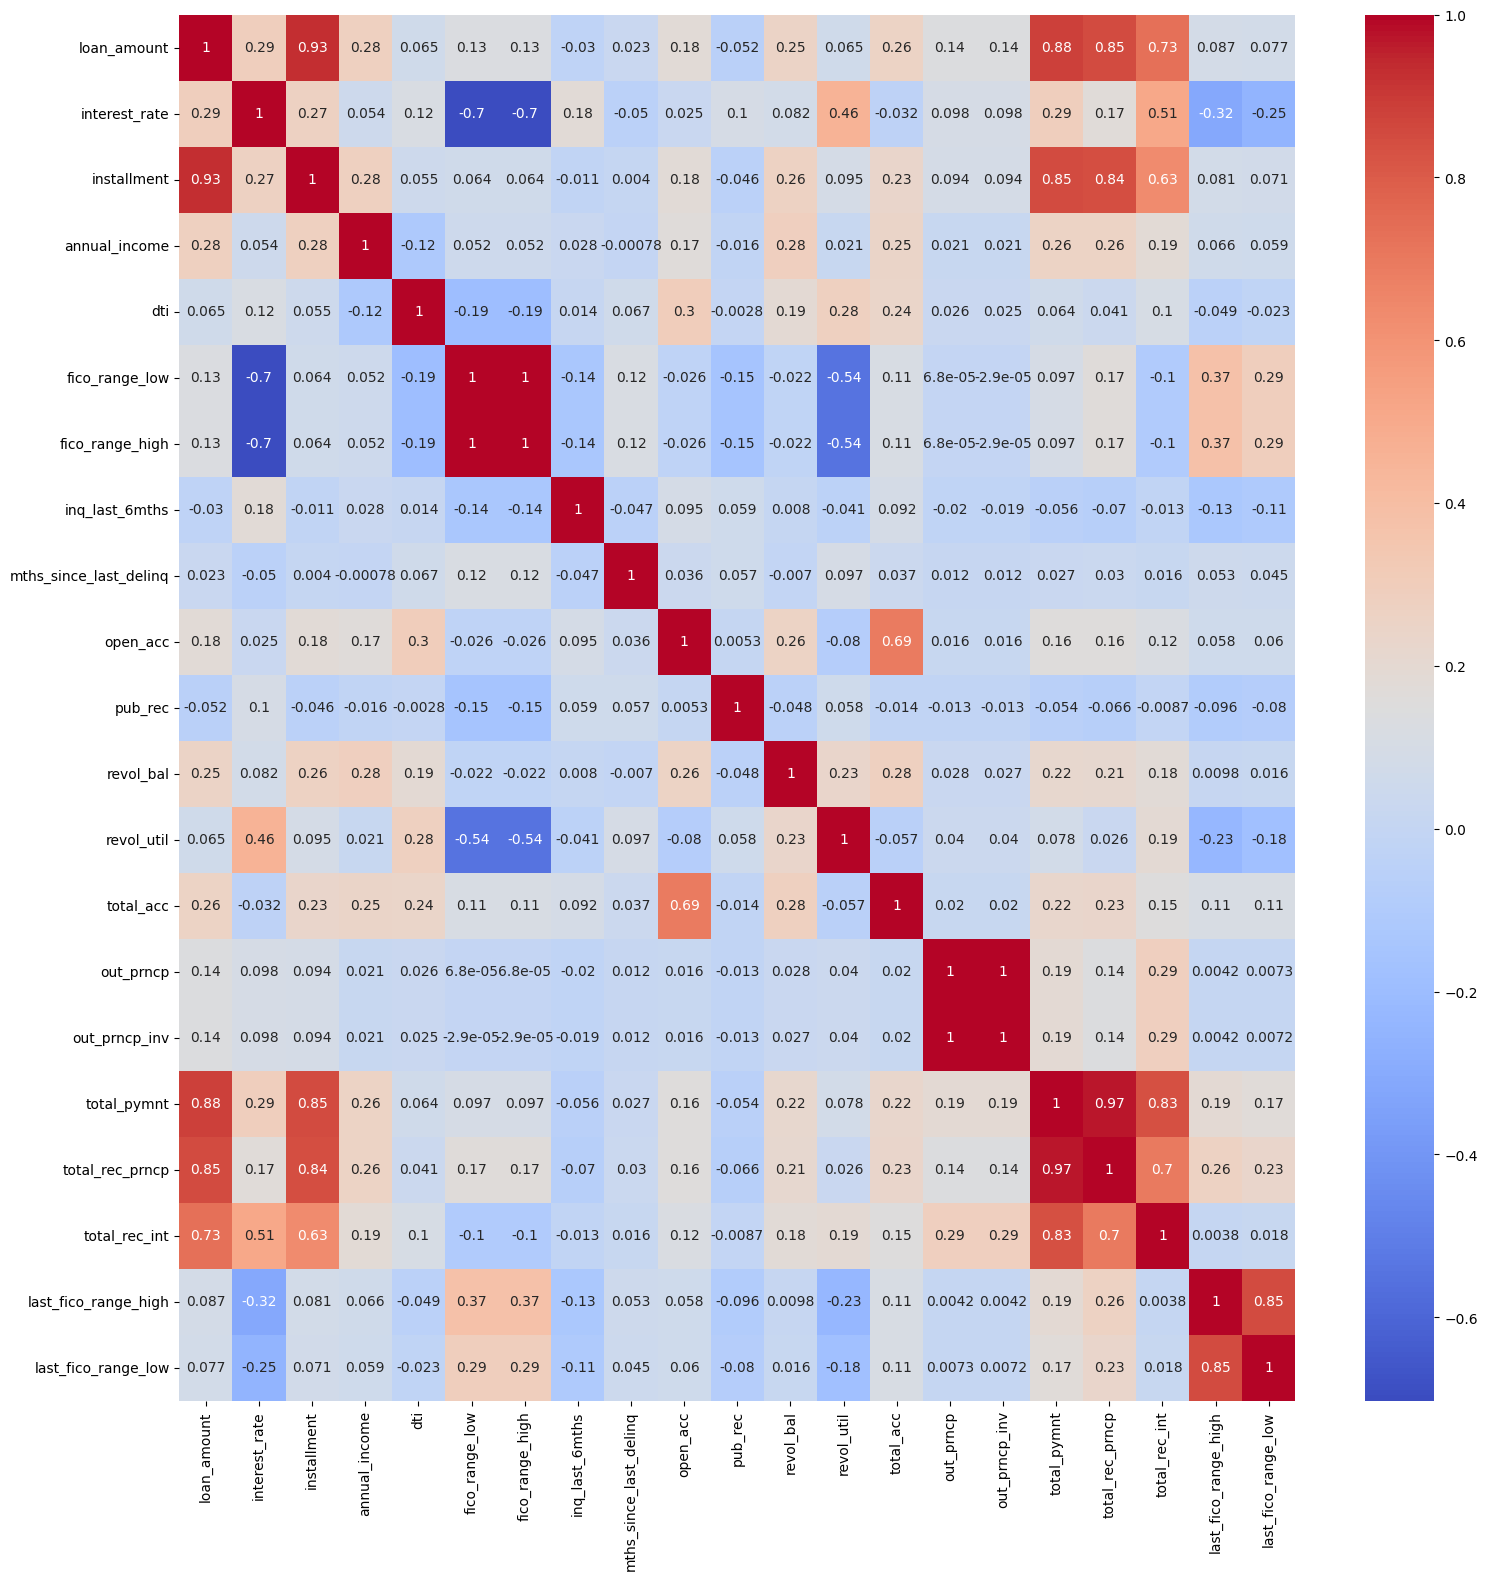

In [ ]:
import seaborn as sns  #finding correlation and plotting heatmap and the pearson correlation between the numerical features
plt.figure(figsize=(18,18))
cor = new_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(new_df,.85)
print(len(set(corr_features)))
print(corr_features)

6
{'total_rec_prncp', 'last_fico_range_low', 'total_pymnt', 'out_prncp_inv', 'fico_range_high', 'installment'}


In [ ]:
data = data.drop(columns=['out_prncp_inv', 'installment', 'total_rec_prncp', 'last_fico_range_low', 'total_pymnt', 'fico_range_high'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   issue_d                 42549 non-null  object 
 7   loan_status             42549 non-null  object 
 8   dti                     42549 non-null  float64
 9   earliest_cr_line        42518 non-null  object 
 10  fico_range_low          42549 non-null  float64
 11  inq_last_6mths          42518 non-null  float64
 12  mths_since_last_delinq  15612 non-null  float64
 13  open_acc                42518 non-null  float64
 14  pub_rec                 42518 non-null

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.head(50)


,loan_amount,term,interest_rate,grade,annual_income,verification_status,issue_d,loan_status,dti,earliest_cr_line,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,last_fico_range_high
0,5000.0,36 months,10.65,B,24000.00,Verified,Dec-11,Fully Paid,27.65,Jan-85,735.0,1.0,NaN,3.0,0.0,13648.0,0.8370,9.0,0.00,863.16,744.0
1,2500.0,60 months,15.27,C,30000.00,Source Verified,Dec-11,Charged Off,1.00,Apr-99,740.0,5.0,NaN,3.0,0.0,1687.0,0.0940,4.0,0.00,435.17,499.0
2,2400.0,36 months,15.96,C,12252.00,Not Verified,Dec-11,Fully Paid,8.72,Nov-01,735.0,2.0,NaN,2.0,0.0,2956.0,0.9850,10.0,0.00,605.67,719.0
3,10000.0,36 months,13.49,C,49200.00,Source Verified,Dec-11,Fully Paid,20.00,Feb-96,690.0,1.0,35.0,10.0,0.0,5598.0,0.2100,37.0,0.00,2214.92,604.0
4,3000.0,60 months,12.69,B,80000.00,Source Verified,Dec-11,Current,17.94,Jan-96,695.0,0.0,38.0,15.0,0.0,27783.0,0.5390,38.0,270.78,1055.27,694.0
5,5000.0,36 months,7.90,A,36000.00,Source Verified,Dec-11,Fully Paid,11.20,Nov-04,730.0,3.0,NaN,9.0,0.0,7963.0,0.2830,12.0,0.00,632.21,679.0
6,7000.0,60 months,15.96,C,47004.00,Not Verified,Dec-11,Fully Paid,23.51,Jul-05,690.0,1.0,NaN,7.0,0.0,17726.0,0.8560,11.0,0.00,3137.84,654.0
7,3000.0,36 months,18.64,E,48000.00,Source Verified,Dec-11,Fully Paid,5.35,Jan-07,660.0,2.0,NaN,4.0,0.0,8221.0,0.8750,4.0,0.00,939.14,689.0
8,5600.0,60 months,21.28,F,40000.00,Source Verified,Dec-11,Charged Off,5.55,Apr-04,675.0,2.0,NaN,11.0,0.0,5210.0,0.3260,13.0,0.00,294.94,499.0
9,5375.0,60 months,12.69,B,15000.00,Verified,Dec-11,Charged Off,18.08,Sep-04,725.0,0.0,NaN,2.0,0.0,9279.0,0.3650,3.0,0.00,533.42,519.0


In [ ]:
data.pub_rec.unique()
data.pub_rec.value_counts()

,count
pub_rec,
0.0,40141
1.0,2299
2.0,64
3.0,11
4.0,2
5.0,1


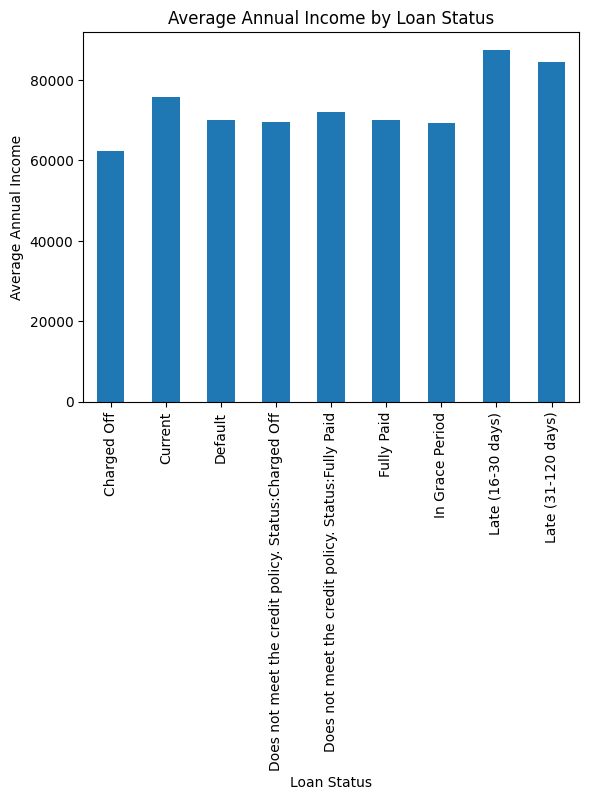

In [ ]:
import matplotlib.pyplot as plt
data.groupby('loan_status')['annual_income'].mean().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Average Annual Income')
_ = plt.title('Average Annual Income by Loan Status')

In [ ]:
data.shape

(42552, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   issue_d                 42549 non-null  object 
 7   loan_status             42549 non-null  object 
 8   dti                     42549 non-null  float64
 9   earliest_cr_line        42518 non-null  object 
 10  fico_range_low          42549 non-null  float64
 11  inq_last_6mths          42518 non-null  float64
 12  mths_since_last_delinq  15612 non-null  float64
 13  open_acc                42518 non-null  float64
 14  pub_rec                 42518 non-null

In [ ]:
data.mths_since_last_delinq.unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

In [ ]:
data = data.drop(columns=['issue_d']) #not important for prediction after going through domain research
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   loan_status             42549 non-null  object 
 7   dti                     42549 non-null  float64
 8   earliest_cr_line        42518 non-null  object 
 9   fico_range_low          42549 non-null  float64
 10  inq_last_6mths          42518 non-null  float64
 11  mths_since_last_delinq  15612 non-null  float64
 12  open_acc                42518 non-null  float64
 13  pub_rec                 42518 non-null  float64
 14  revol_bal               42549 non-null

In [ ]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values') #gives percentage of missing values

loan_amount 0.0001  % missing values
term 0.0001  % missing values
interest_rate 0.0001  % missing values
grade 0.0001  % missing values
annual_income 0.0002  % missing values
verification_status 0.0001  % missing values
loan_status 0.0001  % missing values
dti 0.0001  % missing values
earliest_cr_line 0.0008  % missing values
fico_range_low 0.0001  % missing values
inq_last_6mths 0.0008  % missing values
mths_since_last_delinq 0.6331  % missing values
open_acc 0.0008  % missing values
pub_rec 0.0008  % missing values
revol_bal 0.0001  % missing values
revol_util 0.0022  % missing values
total_acc 0.0008  % missing values
out_prncp 0.0001  % missing values
total_rec_int 0.0001  % missing values
last_fico_range_high 0.0001  % missing values


In [ ]:
data.mths_since_last_delinq.value_counts()

,count
mths_since_last_delinq,
0.0,821
30.0,270
19.0,266
23.0,266
15.0,263
...,...
89.0,1
107.0,1
85.0,1


In [ ]:
df = data[data['loan_amount'].notna()]
df

,loan_amount,term,interest_rate,grade,annual_income,verification_status,loan_status,dti,earliest_cr_line,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,last_fico_range_high
0,5000.0,36 months,10.65,B,24000.0,Verified,Fully Paid,27.65,Jan-85,735.0,1.0,NaN,3.0,0.0,13648.0,0.837,9.0,0.00,863.16,744.0
1,2500.0,60 months,15.27,C,30000.0,Source Verified,Charged Off,1.00,Apr-99,740.0,5.0,NaN,3.0,0.0,1687.0,0.094,4.0,0.00,435.17,499.0
2,2400.0,36 months,15.96,C,12252.0,Not Verified,Fully Paid,8.72,Nov-01,735.0,2.0,NaN,2.0,0.0,2956.0,0.985,10.0,0.00,605.67,719.0
3,10000.0,36 months,13.49,C,49200.0,Source Verified,Fully Paid,20.00,Feb-96,690.0,1.0,35.0,10.0,0.0,5598.0,0.210,37.0,0.00,2214.92,604.0
4,3000.0,60 months,12.69,B,80000.0,Source Verified,Current,17.94,Jan-96,695.0,0.0,38.0,15.0,0.0,27783.0,0.539,38.0,270.78,1055.27,694.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42545,20000.0,60 months,17.51,E,64480.0,Source Verified,Charged Off,15.97,Apr-77,695.0,0.0,NaN,18.0,1.0,25058.0,0.731,32.0,0.00,3023.23,674.0
42546,16000.0,60 months,6.91,A,47500.0,Source Verified,Charged Off,10.64,May-01,735.0,0.0,NaN,11.0,0.0,14636.0,0.684,18.0,0.00,2525.96,534.0
42547,20000.0,36 months,9.88,B,55000.0,Not Verified,Fully Paid,3.34,Aug-95,800.0,2.0,NaN,15.0,0.0,4134.0,0.082,36.0,0.00,3193.07,839.0
42548,1750.0,36 months,11.83,B,40000.0,Not Verified,Fully Paid,22.44,Oct-92,705.0,1.0,NaN,11.0,0.0,7757.0,0.930,24.0,0.00,153.99,709.0


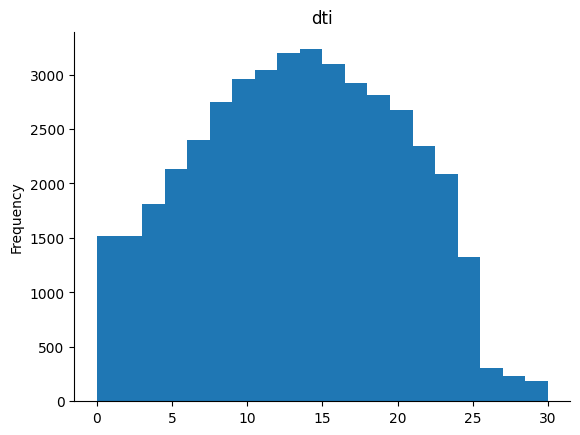

In [ ]:
# @title dti

from matplotlib import pyplot as plt
df['dti'].plot(kind='hist', bins=20, title='dti')
plt.gca().spines[['top', 'right',]].set_visible(False)

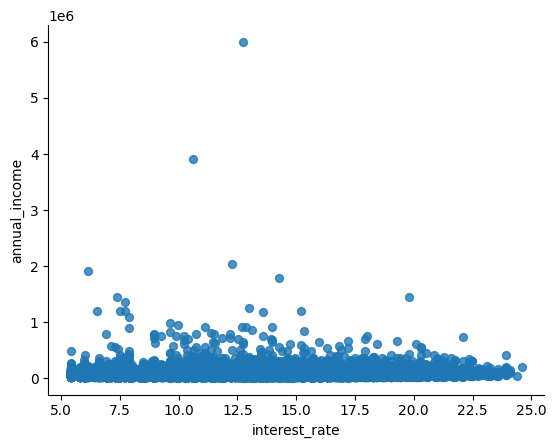

In [ ]:
# @title interest_rate vs annual_income

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='interest_rate', y='annual_income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

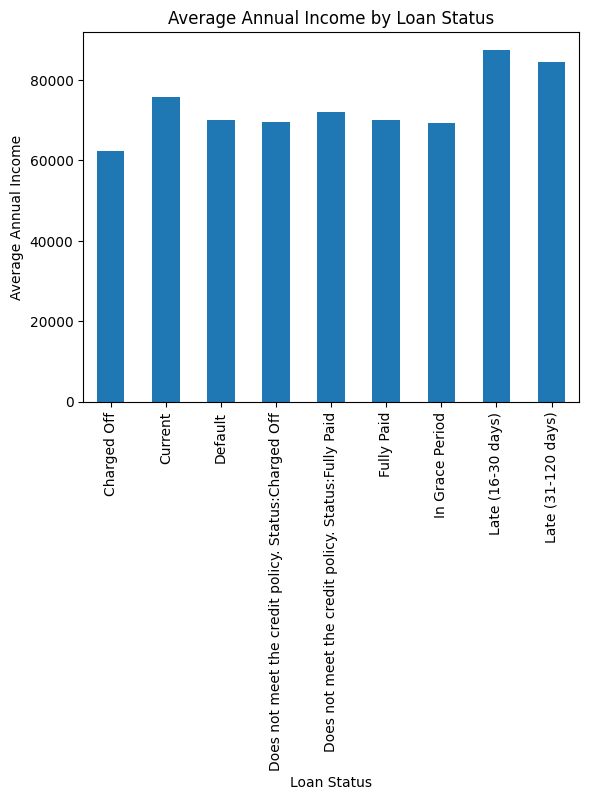

In [ ]:
# @title Average annual income by loan status

import matplotlib.pyplot as plt
df.groupby('loan_status')['annual_income'].mean().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Average Annual Income')
_ = plt.title('Average Annual Income by Loan Status')

In [ ]:
df.shape

(42549, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42549 entries, 0 to 42549
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   loan_status             42549 non-null  object 
 7   dti                     42549 non-null  float64
 8   earliest_cr_line        42518 non-null  object 
 9   fico_range_low          42549 non-null  float64
 10  inq_last_6mths          42518 non-null  float64
 11  mths_since_last_delinq  15612 non-null  float64
 12  open_acc                42518 non-null  float64
 13  pub_rec                 42518 non-null  float64
 14  revol_bal               42549 non-null  flo

In [ ]:
df = pd.DataFrame(data)     ##replaced missing values with median using imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

df['inq_last_6mths'] = imputer.fit_transform(df[['inq_last_6mths']])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   loan_status             42549 non-null  object 
 7   dti                     42549 non-null  float64
 8   earliest_cr_line        42518 non-null  object 
 9   fico_range_low          42549 non-null  float64
 10  inq_last_6mths          42552 non-null  float64
 11  mths_since_last_delinq  15612 non-null  float64
 12  open_acc                42518 non-null  float64
 13  pub_rec                 42518 non-null  float64
 14  revol_bal               42549 non-null

In [ ]:
df['mths_since_last_delinq'] = imputer.fit_transform(df[['mths_since_last_delinq']])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   loan_status             42549 non-null  object 
 7   dti                     42549 non-null  float64
 8   earliest_cr_line        42518 non-null  object 
 9   fico_range_low          42549 non-null  float64
 10  inq_last_6mths          42552 non-null  float64
 11  mths_since_last_delinq  42552 non-null  float64
 12  open_acc                42518 non-null  float64
 13  pub_rec                 42518 non-null  float64
 14  revol_bal               42549 non-null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   loan_status             42549 non-null  object 
 7   dti                     42549 non-null  float64
 8   earliest_cr_line        42518 non-null  object 
 9   fico_range_low          42549 non-null  float64
 10  inq_last_6mths          42552 non-null  float64
 11  mths_since_last_delinq  42552 non-null  float64
 12  open_acc                42518 non-null  float64
 13  pub_rec                 42518 non-null  float64
 14  revol_bal               42549 non-null

In [ ]:
# one_hot_encoded = pd.get_dummies(data['term'], prefix='category')
# data = pd.concat([data, one_hot_encoded], axis=1)
data.verification_status.value_counts()

,count
verification_status,
Not Verified,18765
Verified,13474
Source Verified,10310


In [ ]:
data.term.value_counts()

,count
term,
36 months,31543
60 months,11006


In [ ]:
#df.sub_grade.unique()

In [ ]:
frequency_map = df['grade'].value_counts(normalize=True)

# Step 2: Map Frequencies
df['grade_encoded'] = df['grade'].map(frequency_map)


In [ ]:
df

,loan_amount,term,interest_rate,grade,annual_income,verification_status,loan_status,dti,earliest_cr_line,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,last_fico_range_high,grade_encoded
0,5000.0,36 months,10.65,B,24000.0,Verified,Fully Paid,27.65,Jan-85,735.0,1.0,33.0,3.0,0.0,13648.0,0.837,9.0,0.00,863.16,744.0,0.291264
1,2500.0,60 months,15.27,C,30000.0,Source Verified,Charged Off,1.00,Apr-99,740.0,5.0,33.0,3.0,0.0,1687.0,0.094,4.0,0.00,435.17,499.0,0.205457
2,2400.0,36 months,15.96,C,12252.0,Not Verified,Fully Paid,8.72,Nov-01,735.0,2.0,33.0,2.0,0.0,2956.0,0.985,10.0,0.00,605.67,719.0,0.205457
3,10000.0,36 months,13.49,C,49200.0,Source Verified,Fully Paid,20.00,Feb-96,690.0,1.0,35.0,10.0,0.0,5598.0,0.210,37.0,0.00,2214.92,604.0,0.205457
4,3000.0,60 months,12.69,B,80000.0,Source Verified,Current,17.94,Jan-96,695.0,0.0,38.0,15.0,0.0,27783.0,0.539,38.0,270.78,1055.27,694.0,0.291264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42547,20000.0,36 months,9.88,B,55000.0,Not Verified,Fully Paid,3.34,Aug-95,800.0,2.0,33.0,15.0,0.0,4134.0,0.082,36.0,0.00,3193.07,839.0,0.291264
42548,1750.0,36 months,11.83,B,40000.0,Not Verified,Fully Paid,22.44,Oct-92,705.0,1.0,33.0,11.0,0.0,7757.0,0.930,24.0,0.00,153.99,709.0,0.291264
42549,5000.0,36 months,7.75,A,70000.0,Not Verified,Does not meet the credit policy. Status:Fully ...,8.81,NaN,770.0,1.0,33.0,NaN,NaN,0.0,NaN,NaN,0.00,619.76,794.0,0.239442
42550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## remove frequency_encoded and grade


In [ ]:
df = df.iloc[:-2]


# # Perform one-hot encoding
# from sklearn.preprocessing import OneHotEncoder
# # Concatenate the one-hot encoded columns with the original DataFrame
# ohe = OneHotEncoder(handle_unknown='ignore',sparse_output = False).set_output(transform='pandas')
# ohe_transform = ohe.fit_transform(df[['term']])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42550 entries, 0 to 42549
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   loan_status             42549 non-null  object 
 7   dti                     42549 non-null  float64
 8   earliest_cr_line        42518 non-null  object 
 9   fico_range_low          42549 non-null  float64
 10  inq_last_6mths          42550 non-null  float64
 11  mths_since_last_delinq  42550 non-null  float64
 12  open_acc                42518 non-null  float64
 13  pub_rec                 42518 non-null  float64
 14  revol_bal               42549 non-null

In [ ]:
df.term.value_counts()

,count
term,
36 months,31543
60 months,11006


In [ ]:
from sklearn.preprocessing import LabelEncoder  #applying one hot encoder

column_name = 'term'

label_encoder = LabelEncoder()

df[column_name + '_encoded'] = label_encoder.fit_transform(df[column_name])


<ipython-input-158-1bb183a45030>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_encoded'] = label_encoder.fit_transform(df[column_name])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42550 entries, 0 to 42549
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   loan_status             42549 non-null  object 
 7   dti                     42549 non-null  float64
 8   earliest_cr_line        42518 non-null  object 
 9   fico_range_low          42549 non-null  float64
 10  inq_last_6mths          42550 non-null  float64
 11  mths_since_last_delinq  42550 non-null  float64
 12  open_acc                42518 non-null  float64
 13  pub_rec                 42518 non-null  float64
 14  revol_bal               42549 non-null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42550 entries, 0 to 42549
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   term                    42549 non-null  object 
 2   interest_rate           42549 non-null  float64
 3   grade                   42549 non-null  object 
 4   annual_income           42545 non-null  float64
 5   verification_status     42549 non-null  object 
 6   loan_status             42549 non-null  object 
 7   dti                     42549 non-null  float64
 8   earliest_cr_line        42518 non-null  object 
 9   fico_range_low          42549 non-null  float64
 10  inq_last_6mths          42550 non-null  float64
 11  mths_since_last_delinq  42550 non-null  float64
 12  open_acc                42518 non-null  float64
 13  pub_rec                 42518 non-null  float64
 14  revol_bal               42549 non-null

In [ ]:
df

,loan_amount,term,interest_rate,grade,annual_income,verification_status,loan_status,dti,earliest_cr_line,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,last_fico_range_high,grade_encoded,term_encoded
0,5000.0,36 months,10.65,B,24000.0,Verified,Fully Paid,27.65,Jan-85,735.0,1.0,33.0,3.0,0.0,13648.0,0.837,9.0,0.00,863.16,744.0,0.291264,0
1,2500.0,60 months,15.27,C,30000.0,Source Verified,Charged Off,1.00,Apr-99,740.0,5.0,33.0,3.0,0.0,1687.0,0.094,4.0,0.00,435.17,499.0,0.205457,1
2,2400.0,36 months,15.96,C,12252.0,Not Verified,Fully Paid,8.72,Nov-01,735.0,2.0,33.0,2.0,0.0,2956.0,0.985,10.0,0.00,605.67,719.0,0.205457,0
3,10000.0,36 months,13.49,C,49200.0,Source Verified,Fully Paid,20.00,Feb-96,690.0,1.0,35.0,10.0,0.0,5598.0,0.210,37.0,0.00,2214.92,604.0,0.205457,0
4,3000.0,60 months,12.69,B,80000.0,Source Verified,Current,17.94,Jan-96,695.0,0.0,38.0,15.0,0.0,27783.0,0.539,38.0,270.78,1055.27,694.0,0.291264,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42545,20000.0,60 months,17.51,E,64480.0,Source Verified,Charged Off,15.97,Apr-77,695.0,0.0,33.0,18.0,1.0,25058.0,0.731,32.0,0.00,3023.23,674.0,0.079814,1
42546,16000.0,60 months,6.91,A,47500.0,Source Verified,Charged Off,10.64,May-01,735.0,0.0,33.0,11.0,0.0,14636.0,0.684,18.0,0.00,2525.96,534.0,0.239442,1
42547,20000.0,36 months,9.88,B,55000.0,Not Verified,Fully Paid,3.34,Aug-95,800.0,2.0,33.0,15.0,0.0,4134.0,0.082,36.0,0.00,3193.07,839.0,0.291264,0
42548,1750.0,36 months,11.83,B,40000.0,Not Verified,Fully Paid,22.44,Oct-92,705.0,1.0,33.0,11.0,0.0,7757.0,0.930,24.0,0.00,153.99,709.0,0.291264,0


In [ ]:
df.drop(columns=['term','grade','earliest_cr_line'],axis=1,inplace=True)  #not necessary for prediction

<ipython-input-162-9452512866e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['term','grade','earliest_cr_line'],axis=1,inplace=True)  #not necessary for prediction


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42550 entries, 0 to 42549
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amount             42549 non-null  float64
 1   interest_rate           42549 non-null  float64
 2   annual_income           42545 non-null  float64
 3   verification_status     42549 non-null  object 
 4   loan_status             42549 non-null  object 
 5   dti                     42549 non-null  float64
 6   fico_range_low          42549 non-null  float64
 7   inq_last_6mths          42550 non-null  float64
 8   mths_since_last_delinq  42550 non-null  float64
 9   open_acc                42518 non-null  float64
 10  pub_rec                 42518 non-null  float64
 11  revol_bal               42549 non-null  float64
 12  revol_util              42457 non-null  float64
 13  total_acc               42518 non-null  float64
 14  out_prncp               42549 non-null

In [ ]:
df.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified', nan], dtype=object)

In [ ]:
column_name = 'verification_status' #ordinal encoding

mapping = {'Source Verified': 1, 'Verified': 2, 'Not Verified': 3, 'nan':4}  # Add more categories as needed

df[column_name + '_encoded'] = df[column_name].map(mapping)


<ipython-input-165-237abb07a305>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_encoded'] = df[column_name].map(mapping)


In [ ]:
df

,loan_amount,interest_rate,annual_income,verification_status,loan_status,dti,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,last_fico_range_high,grade_encoded,term_encoded,verification_status_encoded
0,5000.0,10.65,24000.0,Verified,Fully Paid,27.65,735.0,1.0,33.0,3.0,0.0,13648.0,0.837,9.0,0.00,863.16,744.0,0.291264,0,2.0
1,2500.0,15.27,30000.0,Source Verified,Charged Off,1.00,740.0,5.0,33.0,3.0,0.0,1687.0,0.094,4.0,0.00,435.17,499.0,0.205457,1,1.0
2,2400.0,15.96,12252.0,Not Verified,Fully Paid,8.72,735.0,2.0,33.0,2.0,0.0,2956.0,0.985,10.0,0.00,605.67,719.0,0.205457,0,3.0
3,10000.0,13.49,49200.0,Source Verified,Fully Paid,20.00,690.0,1.0,35.0,10.0,0.0,5598.0,0.210,37.0,0.00,2214.92,604.0,0.205457,0,1.0
4,3000.0,12.69,80000.0,Source Verified,Current,17.94,695.0,0.0,38.0,15.0,0.0,27783.0,0.539,38.0,270.78,1055.27,694.0,0.291264,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42545,20000.0,17.51,64480.0,Source Verified,Charged Off,15.97,695.0,0.0,33.0,18.0,1.0,25058.0,0.731,32.0,0.00,3023.23,674.0,0.079814,1,1.0
42546,16000.0,6.91,47500.0,Source Verified,Charged Off,10.64,735.0,0.0,33.0,11.0,0.0,14636.0,0.684,18.0,0.00,2525.96,534.0,0.239442,1,1.0
42547,20000.0,9.88,55000.0,Not Verified,Fully Paid,3.34,800.0,2.0,33.0,15.0,0.0,4134.0,0.082,36.0,0.00,3193.07,839.0,0.291264,0,3.0
42548,1750.0,11.83,40000.0,Not Verified,Fully Paid,22.44,705.0,1.0,33.0,11.0,0.0,7757.0,0.930,24.0,0.00,153.99,709.0,0.291264,0,3.0


In [ ]:
df.drop(columns=['verification_status'], axis=1,inplace=True)

<ipython-input-167-9b240ebfabc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['verification_status'], axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42550 entries, 0 to 42549
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amount                  42549 non-null  float64
 1   interest_rate                42549 non-null  float64
 2   annual_income                42545 non-null  float64
 3   loan_status                  42549 non-null  object 
 4   dti                          42549 non-null  float64
 5   fico_range_low               42549 non-null  float64
 6   inq_last_6mths               42550 non-null  float64
 7   mths_since_last_delinq       42550 non-null  float64
 8   open_acc                     42518 non-null  float64
 9   pub_rec                      42518 non-null  float64
 10  revol_bal                    42549 non-null  float64
 11  revol_util                   42457 non-null  float64
 12  total_acc                    42518 non-null  float64
 13  out_prncp       

In [ ]:
# Assuming df_copy is the modified DataFrame
df.to_csv("/content/drive/MyDrive/modified_data.csv", index=False)


In [ ]:
# column_name = 'loan_status'

# # Define mapping dictionary for ordinal encoding
# mapping = {'Source Verified': 1, 'Verified': 2, 'Not Verified': 3, 'nan':4}  # Add more categories as needed


# df[column_name + '_encoded'] = df[column_name].map(mapping)

In [ ]:
df_without_null = df.dropna() #drops all the null values rows as they are very minimum nearly 1%


In [ ]:
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42457 entries, 0 to 42548
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amount                  42457 non-null  float64
 1   interest_rate                42457 non-null  float64
 2   annual_income                42457 non-null  float64
 3   loan_status                  42457 non-null  object 
 4   dti                          42457 non-null  float64
 5   fico_range_low               42457 non-null  float64
 6   inq_last_6mths               42457 non-null  float64
 7   mths_since_last_delinq       42457 non-null  float64
 8   open_acc                     42457 non-null  float64
 9   pub_rec                      42457 non-null  float64
 10  revol_bal                    42457 non-null  float64
 11  revol_util                   42457 non-null  float64
 12  total_acc                    42457 non-null  float64
 13  out_prncp            

In [ ]:
df_without_null.loan_status.value_counts()

,count
loan_status,
Fully Paid,33559
Charged Off,5641
Does not meet the credit policy. Status:Fully Paid,1955
Does not meet the credit policy. Status:Charged Off,755
Current,513
In Grace Period,16
Late (31-120 days),12
Late (16-30 days),5
Default,1


In [ ]:
loan_status_names = df_without_null.loan_status.value_counts().index

In [ ]:
loan_status_values = df_without_null.loan_status.value_counts().values

([<matplotlib.patches.Wedge at 0x7aeafbe8ad10>,
 [Text(-0.8914188090862534, 0.6444939928403103, 'Fully Paid'),
  Text(0.7430632145895921, -0.8110838792158195, 'Charged Off'),
  Text(1.0631030720454269, -0.2825099258567319, 'Does not meet the credit policy. Status:Fully Paid'),
  Text(1.0982388224259485, -0.06222128989715718, 'Does not meet the credit policy. Status:Charged Off')],
 [Text(-0.4862284413197745, 0.3515421779128965, '80.07%'),
  Text(0.40530720795795927, -0.4424093886631742, '13.46%'),
  Text(0.5798744029338692, -0.15409632319458103, '4.66%'),
  Text(0.5990393576868809, -0.033938885398449366, '1.80%')])

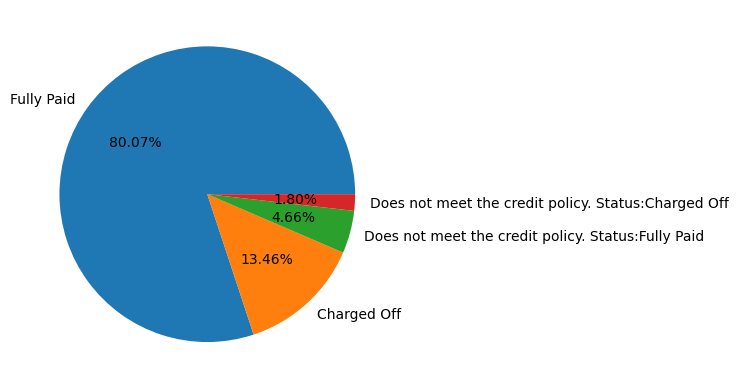

In [ ]:
plt.pie(loan_status_values[:4], labels=loan_status_names[:4],autopct='%1.2f%%')

In [ ]:
column_name = 'loan_status'

# Define mapping dictionary for ordinal encoding
mapping = {'Fully Paid': 1, 'Charged Off': 0, 'Does not meet the credit policy. Status:Fully Paid': 1, 'Does not meet the credit policy. Status:Charged Off':0,'Current':1,'In Grace Period':0,'Late (31-120 days)':0,'Late (16-30 days)':0,'Default':0}  # Add more categories as needed


df[column_name + '_encoded'] = df_without_null[column_name].map(mapping)

<ipython-input-177-ec47244a33cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_encoded'] = df_without_null[column_name].map(mapping)


In [ ]:
df_without_null

,loan_amount,interest_rate,annual_income,loan_status,dti,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,last_fico_range_high,grade_encoded,term_encoded,verification_status_encoded
0,5000.0,10.65,24000.0,Fully Paid,27.65,735.0,1.0,33.0,3.0,0.0,13648.0,0.837,9.0,0.00,863.16,744.0,0.291264,0,2.0
1,2500.0,15.27,30000.0,Charged Off,1.00,740.0,5.0,33.0,3.0,0.0,1687.0,0.094,4.0,0.00,435.17,499.0,0.205457,1,1.0
2,2400.0,15.96,12252.0,Fully Paid,8.72,735.0,2.0,33.0,2.0,0.0,2956.0,0.985,10.0,0.00,605.67,719.0,0.205457,0,3.0
3,10000.0,13.49,49200.0,Fully Paid,20.00,690.0,1.0,35.0,10.0,0.0,5598.0,0.210,37.0,0.00,2214.92,604.0,0.205457,0,1.0
4,3000.0,12.69,80000.0,Current,17.94,695.0,0.0,38.0,15.0,0.0,27783.0,0.539,38.0,270.78,1055.27,694.0,0.291264,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42544,20000.0,12.99,74872.0,Fully Paid,22.69,745.0,1.0,33.0,11.0,0.0,11127.0,0.497,23.0,0.00,3206.38,704.0,0.205457,1,2.0
42545,20000.0,17.51,64480.0,Charged Off,15.97,695.0,0.0,33.0,18.0,1.0,25058.0,0.731,32.0,0.00,3023.23,674.0,0.079814,1,1.0
42546,16000.0,6.91,47500.0,Charged Off,10.64,735.0,0.0,33.0,11.0,0.0,14636.0,0.684,18.0,0.00,2525.96,534.0,0.239442,1,1.0
42547,20000.0,9.88,55000.0,Fully Paid,3.34,800.0,2.0,33.0,15.0,0.0,4134.0,0.082,36.0,0.00,3193.07,839.0,0.291264,0,3.0


In [ ]:
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42457 entries, 0 to 42548
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amount                  42457 non-null  float64
 1   interest_rate                42457 non-null  float64
 2   annual_income                42457 non-null  float64
 3   loan_status                  42457 non-null  object 
 4   dti                          42457 non-null  float64
 5   fico_range_low               42457 non-null  float64
 6   inq_last_6mths               42457 non-null  float64
 7   mths_since_last_delinq       42457 non-null  float64
 8   open_acc                     42457 non-null  float64
 9   pub_rec                      42457 non-null  float64
 10  revol_bal                    42457 non-null  float64
 11  revol_util                   42457 non-null  float64
 12  total_acc                    42457 non-null  float64
 13  out_prncp            

In [ ]:
df_without_null.loc[df_without_null.loan_status=="Fully Paid",'loan_status']= 1
df_without_null.loc[df_without_null.loan_status=="Does not meet the credit policy. Status:Fully Paid",'loan_status']=1 #1 is people who paid
df_without_null.loc[df_without_null.loan_status=="Does not meet the credit policy. Status:Charged Off",'loan_status']=0 #0 is people who could not pay back the loan
df_without_null.loc[df_without_null.loan_status=="Charged Off",'loan_status']=0
df_without_null.loc[df_without_null.loan_status=="Current",'loan_status']= 2
df_without_null.loc[df_without_null.loan_status=="In Grace Period",'loan_status'] = 0       ##assuming grace period people are not able to pay back the loan
df_without_null.loc[df_without_null.loan_status=="Late (31-120 days)",'loan_status'] = 0    ##late people are not able to pay back the loan
df_without_null.loc[df_without_null.loan_status=="Late (16-30 days)",'loan_status'] = 0
df_without_null.loc[df_without_null.loan_status=="Default",'loan_status'] = 0




In [ ]:
# In Grace Period                                           16
# Late (31-120 days)                                        12
# Late (16-30 days)                                          5

In [ ]:
df_without_null

,loan_amount,interest_rate,annual_income,loan_status,dti,fico_range_low,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_int,last_fico_range_high,grade_encoded,term_encoded,verification_status_encoded
0,5000.0,10.65,24000.0,1,27.65,735.0,1.0,33.0,3.0,0.0,13648.0,0.837,9.0,0.00,863.16,744.0,0.291264,0,2.0
1,2500.0,15.27,30000.0,0,1.00,740.0,5.0,33.0,3.0,0.0,1687.0,0.094,4.0,0.00,435.17,499.0,0.205457,1,1.0
2,2400.0,15.96,12252.0,1,8.72,735.0,2.0,33.0,2.0,0.0,2956.0,0.985,10.0,0.00,605.67,719.0,0.205457,0,3.0
3,10000.0,13.49,49200.0,1,20.00,690.0,1.0,35.0,10.0,0.0,5598.0,0.210,37.0,0.00,2214.92,604.0,0.205457,0,1.0
4,3000.0,12.69,80000.0,2,17.94,695.0,0.0,38.0,15.0,0.0,27783.0,0.539,38.0,270.78,1055.27,694.0,0.291264,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42544,20000.0,12.99,74872.0,1,22.69,745.0,1.0,33.0,11.0,0.0,11127.0,0.497,23.0,0.00,3206.38,704.0,0.205457,1,2.0
42545,20000.0,17.51,64480.0,0,15.97,695.0,0.0,33.0,18.0,1.0,25058.0,0.731,32.0,0.00,3023.23,674.0,0.079814,1,1.0
42546,16000.0,6.91,47500.0,0,10.64,735.0,0.0,33.0,11.0,0.0,14636.0,0.684,18.0,0.00,2525.96,534.0,0.239442,1,1.0
42547,20000.0,9.88,55000.0,1,3.34,800.0,2.0,33.0,15.0,0.0,4134.0,0.082,36.0,0.00,3193.07,839.0,0.291264,0,3.0


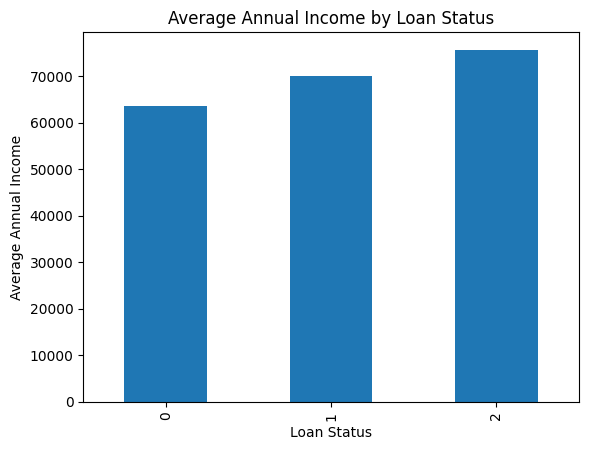

In [ ]:
# @title Average annual income by loan status

import matplotlib.pyplot as plt
df_without_null.groupby('loan_status')['annual_income'].mean().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Average Annual Income')
_ = plt.title('Average Annual Income by Loan Status')

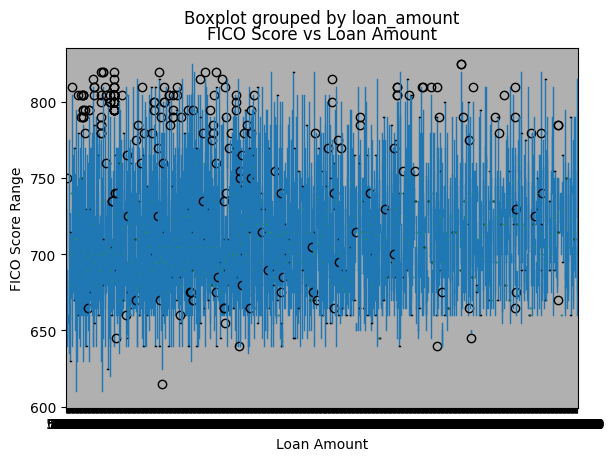

In [ ]:
# @title FICO Score vs Loan Amount

import matplotlib.pyplot as plt
df_without_null.boxplot('fico_range_low', by='loan_amount')
plt.xlabel('Loan Amount')
plt.ylabel('FICO Score Range')
_ = plt.title('FICO Score vs Loan Amount')

In [ ]:
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42457 entries, 0 to 42548
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amount                  42457 non-null  float64
 1   interest_rate                42457 non-null  float64
 2   annual_income                42457 non-null  float64
 3   loan_status                  42457 non-null  object 
 4   dti                          42457 non-null  float64
 5   fico_range_low               42457 non-null  float64
 6   inq_last_6mths               42457 non-null  float64
 7   mths_since_last_delinq       42457 non-null  float64
 8   open_acc                     42457 non-null  float64
 9   pub_rec                      42457 non-null  float64
 10  revol_bal                    42457 non-null  float64
 11  revol_util                   42457 non-null  float64
 12  total_acc                    42457 non-null  float64
 13  out_prncp            

In [ ]:
df_without_null.loan_status.value_counts()

,count
loan_status,
1,35514
0,6430
2,513


In [ ]:
df_without_null.loc[df_without_null.loan_status=="Fully Paid",'loan_status']= 1
df_without_null.loan_status.value_counts()

,count
loan_status,
1,35514
0,6430
2,513


In [ ]:
loan_status_names = df_without_null.loan_status.value_counts().index

In [ ]:
loan_status_values = df_without_null.loan_status.value_counts().values

([<matplotlib.patches.Wedge at 0x7aeaf40498d0>,
 [Text(-0.958001085556694, 0.5405866443709056, '1'),
  Text(0.9367955921032962, -0.5765535695976868, '0'),
  Text(1.099207592045633, -0.04174529421672746, '2')],
 [Text(-0.5225460466672875, 0.2948654423841303, '83.65%'),
  Text(0.5109794138745252, -0.31448376523510185, '15.14%'),
  Text(0.5995677774794361, -0.022770160481851338, '1.21%')])

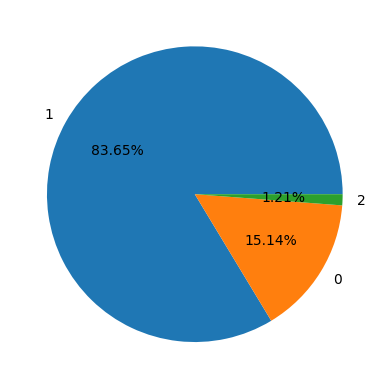

In [ ]:
plt.pie(loan_status_values[:3], labels=loan_status_names[:3],autopct='%1.2f%%')

In [ ]:
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42457 entries, 0 to 42548
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amount                  42457 non-null  float64
 1   interest_rate                42457 non-null  float64
 2   annual_income                42457 non-null  float64
 3   loan_status                  42457 non-null  object 
 4   dti                          42457 non-null  float64
 5   fico_range_low               42457 non-null  float64
 6   inq_last_6mths               42457 non-null  float64
 7   mths_since_last_delinq       42457 non-null  float64
 8   open_acc                     42457 non-null  float64
 9   pub_rec                      42457 non-null  float64
 10  revol_bal                    42457 non-null  float64
 11  revol_util                   42457 non-null  float64
 12  total_acc                    42457 non-null  float64
 13  out_prncp            

In [ ]:
df_without_null.loan_status.unique()

array([1, 0, 2], dtype=object)

In [ ]:
df_without_null['loan_status'] = df_without_null['loan_status'].astype(int)


<ipython-input-193-a642e3733e98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_null['loan_status'] = df_without_null['loan_status'].astype(int)


In [ ]:
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42457 entries, 0 to 42548
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amount                  42457 non-null  float64
 1   interest_rate                42457 non-null  float64
 2   annual_income                42457 non-null  float64
 3   loan_status                  42457 non-null  int64  
 4   dti                          42457 non-null  float64
 5   fico_range_low               42457 non-null  float64
 6   inq_last_6mths               42457 non-null  float64
 7   mths_since_last_delinq       42457 non-null  float64
 8   open_acc                     42457 non-null  float64
 9   pub_rec                      42457 non-null  float64
 10  revol_bal                    42457 non-null  float64
 11  revol_util                   42457 non-null  float64
 12  total_acc                    42457 non-null  float64
 13  out_prncp            

In [ ]:
from sklearn.model_selection import train_test_split
X = df_without_null.drop('loan_status', axis=1)  # Extract features
y = df_without_null['loan_status']  # Extract target label
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.33, random_state = 50  )

In [ ]:
y_test

,loan_status
2628,1
8934,0
14795,1
23311,0
41678,0
...,...
17539,1
19528,1
18792,1
35772,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini",max_depth=3)  ##kept max depth to stop growing to fullest 88%
#clf = DecisionTreeClassifier(criterion="entropy",max_depth=20)
#clf = DecisionTreeClassifier(criterion="entropy",max_depth=30)

clf= clf.fit(X_train,y_train)

In [ ]:
clf.get_params()  #parameteres we currently using

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8713867675397902

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))


              precision    recall  f1-score   support

           0       0.48      0.57      0.52      1717
           1       0.94      0.91      0.93     12099
           2       0.99      0.93      0.96       195

    accuracy                           0.87     14011
   macro avg       0.80      0.81      0.80     14011
weighted avg       0.88      0.87      0.88     14011



Overall the model has accuracy of 87% , the model does not do a good job in classifiying whether the person has defaulted the loan as the metrics are less than for it compared to others.





In [ ]:
from sklearn.metrics import confusion_matrix

true_labels = y_test # Your true labels (ground truth)
predicted_labels = predictions # Your predicted labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  983  1055    13]
 [  732 11044     0]
 [    2     0   182]]


[Text(0.5, 0.875, 'x[14] <= 656.5\ngini = 0.28\nsamples = 28446\nvalue = [4379, 23738, 329]'),
 Text(0.25, 0.625, 'x[16] <= 0.5\ngini = 0.501\nsamples = 8361\nvalue = [3629, 4660, 72]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[14] <= 546.5\ngini = 0.462\nsamples = 5881\nvalue = [2133, 3748, 0]'),
 Text(0.0625, 0.125, 'gini = 0.493\nsamples = 1255\nvalue = [703, 552, 0]'),
 Text(0.1875, 0.125, 'gini = 0.427\nsamples = 4626\nvalue = [1430, 3196, 0]'),
 Text(0.375, 0.375, 'x[12] <= 34.77\ngini = 0.5\nsamples = 2480\nvalue = [1496, 912, 72]'),
 Text(0.3125, 0.125, 'gini = 0.472\nsamples = 2395\nvalue = [1483, 912, 0]'),
 Text(0.4375, 0.125, 'gini = 0.259\nsamples = 85\nvalue = [13.0, 0.0, 72.0]'),
 Text(0.75, 0.625, 'x[12] <= 2.315\ngini = 0.096\nsamples = 20085\nvalue = [750, 19078, 257]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[14] <= 681.5\ngini = 0.072\nsamples = 19821\nvalue = [743, 19078, 0]'),
 Text(0.5625, 0.125, 'gini = 0.267\nsamples = 3024\nvalue = [4

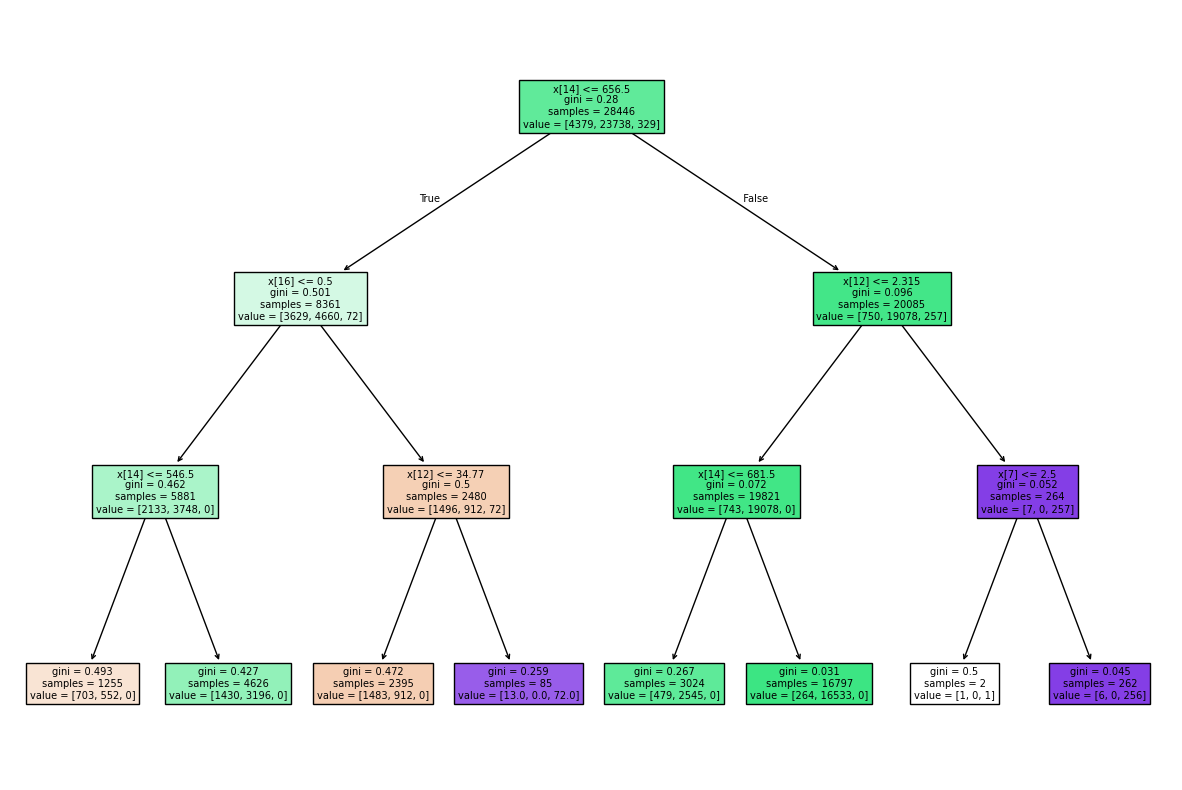

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)